# 🧠 Ulasan pada X — BERT Fine-Tuning untuk Klasifikasi dan Analisis Aspek Menggunakan BERTopic (TensorFlow)

Penelitian ini bertujuan untuk **melakukan fine-tuning pada model *IndoBERT*** guna melakukan **klasifikasi sentimen serta identifikasi aspek yang sering dibahas** dalam ulasan pengguna terhadap aplikasi *X*.  
Model yang digunakan merupakan *pre-trained model* bahasa Indonesia yang dikembangkan oleh **B. Wilie et al. (2020)**, yaitu **IndoBERT**, yang telah terbukti efektif dalam berbagai tugas *Natural Language Processing (NLP)* berbahasa Indonesia.  

Pendekatan ini memanfaatkan kemampuan *transformer architecture* dalam memahami konteks semantik antar kata untuk mengklasifikasikan sentimen (*positif dan negatif*) dan mengevaluasi kinerjanya dengan metrik **akurasi, presisi, recall, dan F1-score**.  
Selanjutnya, analisis aspek dilakukan menggunakan **BERTopic**, yang berbasis *transformer embeddings* dan *clustering* untuk mengidentifikasi topik utama yang sering muncul dalam ulasan pengguna.  

---

### 🎯 Tujuan Penelitian
1. Melakukan *fine-tuning* model **IndoBERT-base-p2** menggunakan dataset ulasan aplikasi X.  
2. Melakukan klasifikasi sentimen (positif, negatif, netral) berdasarkan hasil *fine-tuning*.  
3. Mengevaluasi performa model dengan **akurasi, presisi, recall, dan F1-score**.  
4. Mengidentifikasi topik dan aspek yang sering dibahas menggunakan **BERTopic**.  

---

### 🧩 Tahapan Penelitian
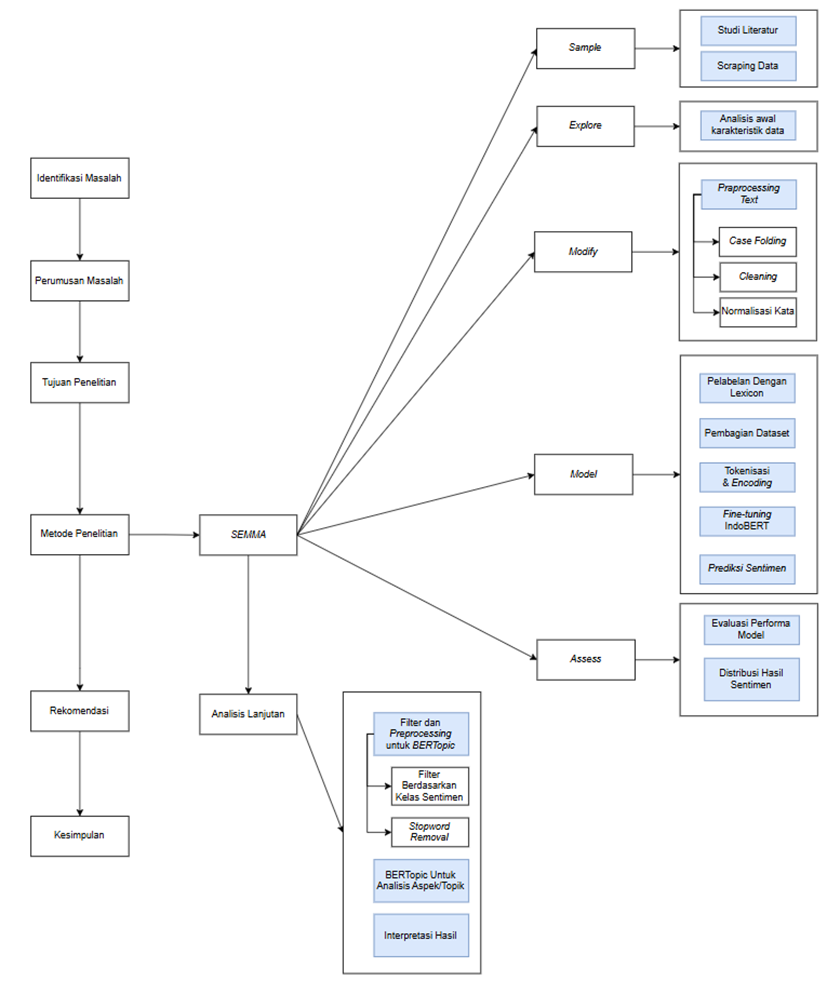
---

> **Referensi:**  
> Wilie, B., et al. (2020). *IndoNLU: Benchmark and Resources for Evaluating Indonesian Natural Language Understanding.*  
> arXiv: [2009.05387](https://arxiv.org/abs/2009.05387)  
> Model: [https://huggingface.co/indobenchmark/indobert-base-p2](https://huggingface.co/indobenchmark/indobert-base-p2)


# 🧩 1. Sample

Tahap **Sample** merupakan langkah awal dalam metodologi **SEMMA** yang berfokus pada proses pengumpulan dan pemilihan data yang relevan dengan tujuan penelitian.  
Tujuannya adalah memperoleh data yang representatif agar hasil analisis dapat mencerminkan persepsi pengguna secara akurat.

---

### 🔹 1. Studi Literatur
Dilakukan untuk memahami teori dan penelitian terdahulu terkait:
- Analisis sentimen menggunakan *IndoBERT*.
- Teknik *fine-tuning* model bahasa.
- Pendekatan analisis topik menggunakan **BERTopic**.  
Tahapan ini menjadi dasar dalam merancang kerangka dan metodologi penelitian.

---

### 🔹 2. Scraping Data
Data dikumpulkan secara otomatis menggunakan **TweetHarvest (Python)**.  
Proses ini mengekstraksi tweet berdasarkan kata kunci tertentu yang berkaitan dengan topik penelitian, kemudian menyimpannya dalam format CSV untuk tahap *preprocessing* berikutnya.


### Twitter Auth Token

In [ ]:
twitter_auth_token = 'b7cc5ddd2a301c1cb5aeb87581a01ae6227e86df' # change this auth token

### Instalasi dan Konfigurasi Lingkungan Scraping X/Twitter

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.2 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,822 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,161 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:14

### Mulai Mencari Data Ulasan X Perbulan

In [ ]:
filename="byond_oktober_2025_new.csv"
search_keyword="byond lang:id since:2025-10-01 until:2025-10-31"

!npx -y tweet-harvest@2.6.1 -o "$filename" -s "$search_keyword" --tab "LATEST" -l 3000 --token $twitter_auth_token

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠴npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠴npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This s

# 🔍 2. Explore

Tahapan **Explore** berfokus pada analisis awal terhadap karakteristik data hasil *scraping* menggunakan *Tweetharvest Python*.  
Langkah ini mencakup pemeriksaan struktur data, distribusi sentimen awal, serta pola umum dalam teks seperti frekuensi kata dan penggunaan *hashtag*.
  
Tujuan utamanya adalah memahami kondisi dan kualitas data sebelum masuk ke tahap *preprocessing* dan pemodelan.


In [1]:
import pandas as pd

# Membaca file CSV langsung dari direktori saat ini
df = pd.read_csv("merge_data_x.csv", delimiter=",")

# Menampilkan DataFrame
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1982122526684623250,Sat Oct 25 16:30:11 +0000 2025,29,byond bsi gangguan gasih? gw topup shopay uda...,1982122526684623250,https://pbs.twimg.com/media/G4Hp7x_WAAA8NjZ.jpg,NaN,in,NaN,4,15,2,https://x.com/undefined/status/198212252668462...,1331650559518990336,NaN
1,1981539495863627984,Sat Oct 25 15:32:37 +0000 2025,0,@orionbae_ untuk jaringan stabil lalu dipastik...,1982108043103047709,NaN,orionbae_,in,NaN,0,0,0,https://x.com/undefined/status/198210804310304...,141500996,NaN
2,1981539495863627984,Sat Oct 25 15:32:37 +0000 2025,0,@orionbae_ Assalamualaikum Kak Lala. Kami turu...,1982108039265313207,NaN,orionbae_,in,NaN,0,0,0,https://x.com/undefined/status/198210803926531...,141500996,NaN
3,1981912068925337794,Sat Oct 25 09:38:01 +0000 2025,0,@bankbsi_id Bikin pengaduan masa harus nunggu ...,1982018802553622830,NaN,bankbsi_id,in,NaN,0,4,0,https://x.com/undefined/status/198201880255362...,922120737774739456,NaN
4,1981912068925337794,Sat Oct 25 09:15:06 +0000 2025,0,@yupipuudae @bankbsi_id Iya lagian transaksi b...,1982013034928193698,NaN,yupipuudae,in,NaN,0,5,0,https://x.com/undefined/status/198201303492819...,922120737774739456,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,1863171146650464271,Mon Dec 02 01:01:18 +0000 2024,1,@RacunBelanja Mako cake festival *Periode prom...,1863387933560246279,https://pbs.twimg.com/media/GdwVcqdbgAAmzDk.jpg,RacunBelanja,in,NaN,0,1,0,https://x.com/undefined/status/186338793356024...,91257550,NaN
9161,1863182171005198514,Sun Dec 01 16:00:58 +0000 2024,0,@happyselaluya Kalo byond gabisa tabungan pisa...,1863251957709996314,NaN,happyselaluya,in,NaN,0,1,0,https://x.com/undefined/status/186325195770999...,1662827216,NaN
9162,1863182171005198514,Sun Dec 01 15:37:14 +0000 2024,0,@_akaashine kalau mau pake jago syariah itu bi...,1863245982240260325,NaN,xafirawr,in,NaN,0,1,0,https://x.com/undefined/status/186324598224026...,1353062535759503360,NaN
9163,1863235894968451082,Sun Dec 01 14:57:09 +0000 2024,0,EH ANJAY BGT DAH APK BYOND MASA GUE DAPET CASH...,1863235894968451082,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/186323589496845...,1138760626577088514,NaN


In [2]:
# Jumlah tweet sebelum menghapus duplikat
num_before = len(df)
print(f"Jumlah tweet sebelum menghapus duplikat: {num_before}")

# Hapus duplikat
df = df.drop_duplicates()

# Jumlah tweet setelah menghapus duplikat
num_after = len(df)
print(f"Jumlah tweet setelah menghapus duplikat: {num_after}")

# Opsional: jumlah duplikat yang dihapus
print(f"Jumlah duplikat yang dihapus: {num_before - num_after}")

Jumlah tweet sebelum menghapus duplikat: 9165
Jumlah tweet setelah menghapus duplikat: 9165
Jumlah duplikat yang dihapus: 0


## 2.1 Melihat Data distribusi Tweet perbulan

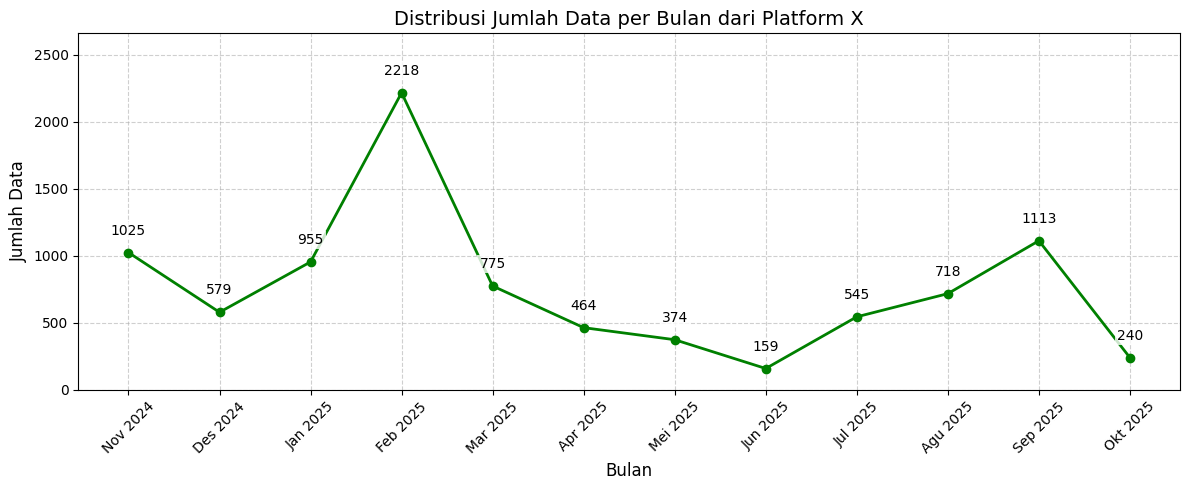

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== DATA AWAL (dari kode pertama) ======
months = [
    "Nov 2024", "Des 2024", "Jan 2025", "Feb 2025", "Mar 2025",
    "Apr 2025", "Mei 2025", "Jun 2025", "Jul 2025", "Agu 2025",
    "Sep 2025", "Okt 2025"
]
tweet_counts = [1025, 579, 955, 2218, 775, 464, 374, 159, 545, 718, 1113, 240]

# ====== BIKIN DATAFRAME supaya alurnya mirip contoh kedua ======
monthly_counts = pd.DataFrame({
    "month_year": months,
    "count": tweet_counts
})

# ====== SORTING BERDASARKAN TANGGAL SEBENARNYA ======
bulan_indo_to_eng = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Mei": "May", "Jun": "Jun", "Jul": "Jul", "Agu": "Aug",
    "Sep": "Sep", "Okt": "Oct", "Nov": "Nov", "Des": "Dec"
}

monthly_counts["month_eng"] = monthly_counts["month_year"].apply(
    lambda x: x.replace(x.split()[0], bulan_indo_to_eng[x.split()[0]])
)

monthly_counts["date_sort"] = pd.to_datetime(monthly_counts["month_eng"], format="%b %Y")
monthly_counts = monthly_counts.sort_values("date_sort").reset_index(drop=True)

# ====== GRAFIK GARIS ======
plt.figure(figsize=(12, 5))
plt.plot(
    monthly_counts["month_year"],
    monthly_counts["count"],
    marker="o",
    linewidth=2,
    color="green"
)

plt.title("Distribusi Jumlah Data per Bulan dari Platform X", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.xticks(rotation=45)

# ====== LABEL DENGAN OFFSET DINAMIS (biar gak nabrak marker) ======
offset = monthly_counts["count"].max() * 0.05  # 5% dari nilai maksimum
for i, count in enumerate(monthly_counts["count"]):
    plt.text(
        i,
        count + offset,
        str(count),
        ha="center",
        va="bottom",
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=1.5)
    )

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# ====== RUANG DI ATAS ======
plt.ylim(0, monthly_counts["count"].max() * 1.20)

plt.show()

## 2.2 Memilih Kolom yang Diinginkan

In [ ]:
# Pilih kolom 'full_text' dan 'created_at'
df = df[['full_text', 'created_at']]

# Tampilkan dataframe yang sudah difilter
display(df)

,full_text,created_at
0,byond bsi gangguan gasih? gw topup shopay uda...,Sat Oct 25 16:30:11 +0000 2025
1,@orionbae_ untuk jaringan stabil lalu dipastik...,Sat Oct 25 15:32:37 +0000 2025
2,@orionbae_ Assalamualaikum Kak Lala. Kami turu...,Sat Oct 25 15:32:37 +0000 2025
3,@bankbsi_id Bikin pengaduan masa harus nunggu ...,Sat Oct 25 09:38:01 +0000 2025
4,@yupipuudae @bankbsi_id Iya lagian transaksi b...,Sat Oct 25 09:15:06 +0000 2025
...,...,...
9160,@RacunBelanja Mako cake festival *Periode prom...,Mon Dec 02 01:01:18 +0000 2024
9161,@happyselaluya Kalo byond gabisa tabungan pisa...,Sun Dec 01 16:00:58 +0000 2024
9162,@_akaashine kalau mau pake jago syariah itu bi...,Sun Dec 01 15:37:14 +0000 2024
9163,EH ANJAY BGT DAH APK BYOND MASA GUE DAPET CASH...,Sun Dec 01 14:57:09 +0000 2024


## 2.3 Memfilter atau Menghapus Tweet Balasan Byond

In [ ]:
# Pastikan teks string
df['full_text'] = df['full_text'].astype(str)

# Keyword tidak relevan
keywords = [
    r"\bAssalamualaikum\b", r"\bAssalamu\b", r"Kami informasikan",
    r"Kami bantu", r"Kami cek", r"Kami teruskan",
    r"Terima kasih telah menghubungi", r"Silakan kirim", r"Mohon maaf",
    r"Halo Kak", r"Min bantu", r"Admin", r"CS", r"DM Kak",
    r"Promo", r"Diskon", r"Hadiah", r"Daftar sekarang",
    r"Event", r"Expo", r"see", r"mako", r"hadirkan",
    r"KemilauEmasSilaturahmiBSI", r"#BankEmasbyBSI"
]

pattern = "|".join(keywords)

# Filter utama
df_filtered = df[
    ~df['full_text'].str.contains(pattern, case=False, regex=True, na=False)
]

# Filter tambahan
df_filtered = df_filtered[
    ~df_filtered['full_text'].str.match(r"^https?://", na=False)
]
df_filtered = df_filtered[df_filtered['full_text'].str.len() > 5]

# Rapikan index
df_filtered = df_filtered.reset_index(drop=True)

# Output
print("Jumlah awal :", len(df))
print("Setelah filter :", len(df_filtered))
df_filtered.head(20)

Jumlah data awal : 9165
Jumlah data setelah filter : 6232


## 2.4 WordCloud dan Frekuensi Data

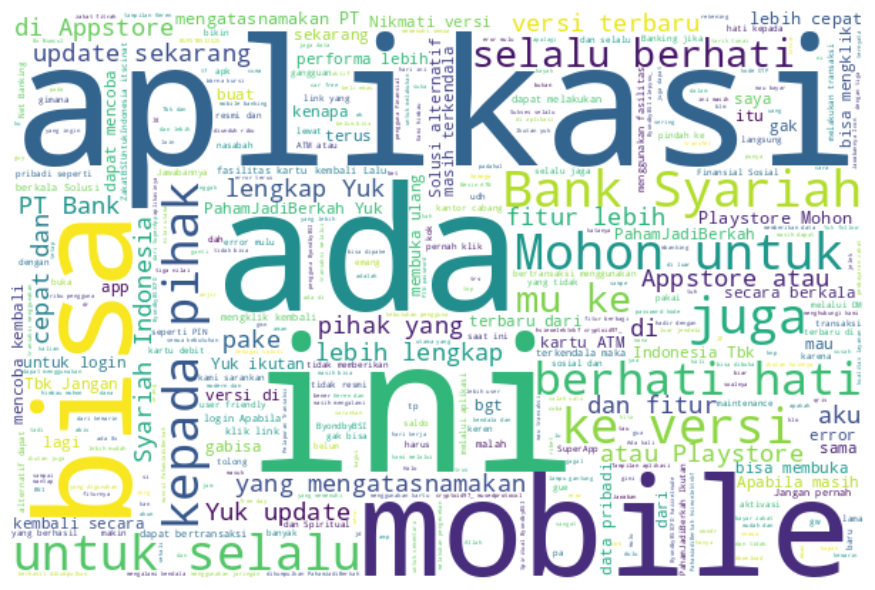

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Bersihkan kolom teks dari NaN
df_filtered['full_text'] = df_filtered['full_text'].fillna('')

# Gabungkan semua teks dari df_filtered
text = ' '.join(df_filtered['full_text'].astype(str).tolist())

# Stopwords bawaan + tambahan custom
stopwords = set(STOPWORDS)
custom_stopwords = [
    'https','co','RT','t','aja','ya','nih','nya','yg','min',
    'logo','kak','kakak','minn','byond','bsi','bankbsi_id',
    'sih','banget','tapi','deh','gitu','ga','iya','wkwk','wkwkwk',
    'haha','hehe','dong','loh','lah','kalo','kalau','udah','sudah',
    'ayo','apa','oke','okehh','okeh','jadi','demgan','cont','yaaa'
]
stopwords.update(custom_stopwords)

# Generate WordCloud
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=600,
    height=400
)

wc.generate(text)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

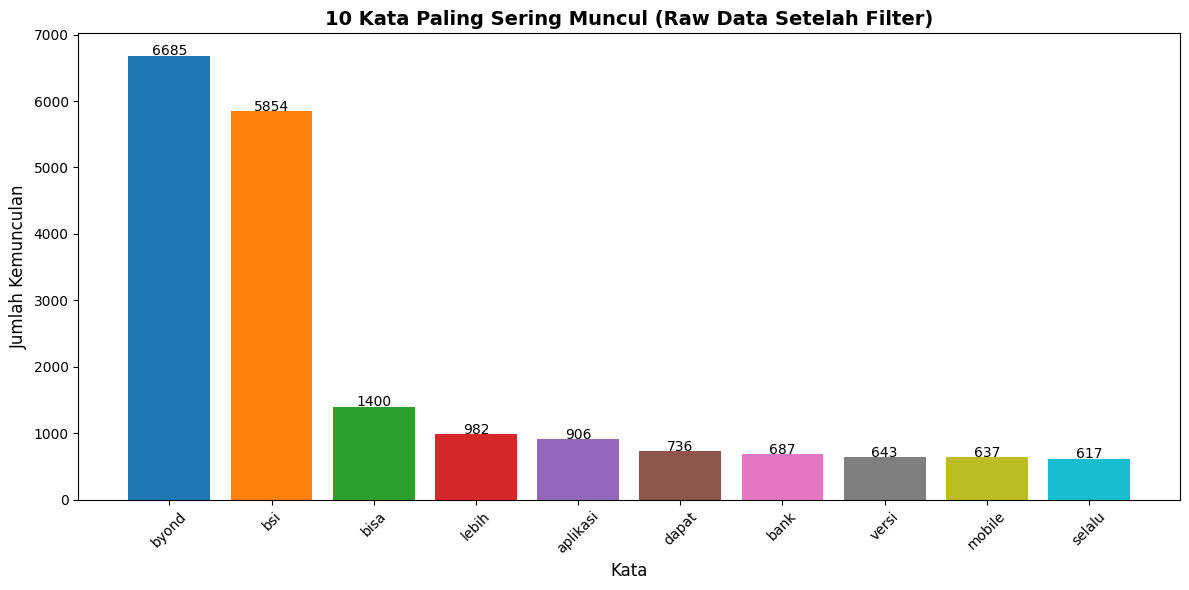

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Stopword dasar + tambahan khusus Twitter
stopwords_basic = {
    'dan','yang','di','ke','dari','untuk','pada','atau','ini','itu',
    'dengan','karena','jadi','saja','tidak','ada','iya','sih','nih',
    'kok','pun','juga','udah','lagi','ayo','kak','kakak', 'cont', 'yuk',
    'rt','amp','co','https','aja','banget','dong','lah','loh','ya',
    'yaa','yah','oke','ok','gue','gua','gw','min','admin', 'pahamjadiberkah'
}

# Gabungkan semua teks X dari df_filtered
all_text = " ".join(df_filtered['full_text'].astype(str)).lower()

# Hapus simbol ringan (bukan preprocessing IndoBERT)
all_text = re.sub(r'[^\w\s]', ' ', all_text)
all_text = re.sub(r'\s+', ' ', all_text)

# Tokenisasi
tokens = all_text.split()

# Filter stopword, angka, kata <3 huruf, kata terlalu panjang
tokens = [
    t for t in tokens
    if t not in stopwords_basic
    and t.isalpha()
    and 3 <= len(t) <= 15
]

# Hitung 10 kata paling sering muncul
top_words = Counter(tokens).most_common(10)
words, counts = zip(*top_words)

# Warna bar otomatis
colors = plt.cm.tab10(range(len(words)))

plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color=colors)

plt.title("10 Kata Paling Sering Muncul (Raw Data Setelah Filter)", fontsize=14, fontweight='bold')
plt.xlabel("Kata", fontsize=12)
plt.ylabel("Jumlah Kemunculan", fontsize=12)
plt.xticks(rotation=45)

# Tambahkan label angka
for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, num + 2, str(num),
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ⚙️ 3. Modify

Tahapan **Modify** berfokus pada pembersihan dan penyeragaman teks sebelum digunakan dalam pemodelan.  
Langkah yang dilakukan mencakup:
- **Case Folding** → mengubah seluruh teks menjadi huruf kecil agar konsisten.  
- **Cleaning** → menghapus URL, angka, tanda baca, serta karakter yang tidak diperlukan menggunakan *regular expression*.  
- **Normalisasi Kata** → menstandarkan bentuk kata agar sesuai dengan struktur bahasa yang benar.  

Tahapan ini memastikan data teks telah bersih, seragam, dan siap digunakan dalam tahap pelatihan model *IndoBERT*.

📚 Library yang Digunakan pada Tahap Modify

Pada tahap *Modify*, digunakan beberapa *library* utama untuk mendukung proses pembersihan dan penyeragaman teks sebelum dilakukan pelatihan model *IndoBERT*.  

Library yang digunakan meliputi:  
- **Pandas** → untuk membaca, mengelola, dan memanipulasi dataset dalam bentuk *DataFrame*, sehingga memudahkan pengolahan teks secara terstruktur.  
- **NumPy** → digunakan untuk operasi numerik serta mendukung manajemen array pada proses transformasi teks.  
- **re (Regular Expression)** → untuk melakukan proses *cleaning*, seperti menghapus URL, angka, tanda baca, simbol, dan karakter tidak relevan dari teks.  
- **string** → digunakan untuk menghapus tanda baca dan karakter khusus pada tahap *cleaning*.  

Kombinasi *library* tersebut memastikan proses *case folding*, *cleaning*, dan *normalisasi kata* berjalan efisien sehingga menghasilkan teks yang bersih, seragam, dan siap digunakan dalam tahap pelatihan model *IndoBERT*.

In [ ]:
!pip install pandas numpy

In [ ]:
import pandas as pd
import numpy as np
import re
import string

##  3.1 Case Folding

In [ ]:
# Mengganti nama kolom 'full_text' menjadi 'comment'
df_filtered = df_filtered.rename(columns={'full_text': 'comment'})

# Membuat kolom baru hasil case folding dari kolom 'comment'
df_filtered['case_folding'] = df_filtered['comment'].astype(str).str.lower()

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding']]

# Cek 10 baris awal
df_filtered.head(10)

,comment,case_folding
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...


##  3.2 Cleaning

In [ ]:
import re

# Fungsi untuk menghapus username (@user)
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)
    return text

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U0001F004-\U0001F0CF"
            u"\U0001F1E0-\U0001F1FF"
            "]+",
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'\d+', '', tweet)
    return tweet


# 🧩 Terapkan Cleaning
df_filtered['cleaning'] = (
    df_filtered['case_folding']
    .apply(remove_username)
    .apply(remove_emoji)
    .apply(remove_symbols)
    .apply(remove_numbers)
)

# 📋 Urutkan Kolom Agar Rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning']]

# 🔍 Tampilkan 10 baris awal
df_filtered.head(10)

,comment,case_folding,cleaning
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...


## 3.3 Normalisasi Kata

In [ ]:
# Tahap Normalisasi Kata
import pandas as pd
import re

# Baca kamus kata baku dari file Excel
kamus = pd.read_excel("kamuskatabaku.xlsx")

# Normalisasi key agar selalu lowercase
kamus['tidak_baku'] = kamus['tidak_baku'].astype(str).str.lower()
kamus['kata_baku']   = kamus['kata_baku'].astype(str).str.lower()

# Buat dictionary normalisasi
kamus_dict = dict(zip(kamus['tidak_baku'], kamus['kata_baku']))

# Fungsi normalisasi teks
def normalize_text(text):
    if text is None or not isinstance(text, str):
        return text

    # Hilangkan spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    if text == "":
        return text

    words = text.split()
    normalized_words = [kamus_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi pada kolom 'cleaning'
df_filtered['normalisasi'] = df_filtered['cleaning'].apply(normalize_text)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi']]

# Tampilkan hasil
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...,buat pengaduan masa harus menunggu hari kerja ...
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...,iya lagian transaksi belum berhasil kok sudah ...
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...,guys skalian nitip prtnyaan please aku mau men...
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...


## 3.4 Tokenisasi Kata

In [ ]:
# Tahap Tokenisasi
import re

def tokenize(text):
    if text is None or not isinstance(text, str):
        return []
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Terapkan tokenisasi pada kolom 'normalisasi'
df_filtered['tokenisasi'] = df_filtered['normalisasi'].apply(tokenize)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi']]

# Tampilkan 10 baris pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul..."
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...,buat pengaduan masa harus menunggu hari kerja ...,"[buat, pengaduan, masa, harus, menunggu, hari,..."
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...,iya lagian transaksi belum berhasil kok sudah ...,"[iya, lagian, transaksi, belum, berhasil, kok,..."
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]"
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,..."
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco..."
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...,guys skalian nitip prtnyaan please aku mau men...,"[guys, skalian, nitip, prtnyaan, please, aku, ..."
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi..."
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm..."
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka..."


## 3.5 Stopword Removal

In [ ]:
# Tahap Stopword Removal
import nltk
from nltk.corpus import stopwords

# Download stopwords Indonesia (sekali saja)
nltk.download('stopwords')

# Stopword dasar NLTK
stop_words = set(stopwords.words('indonesian'))

# Stopword tambahan yang aman (NETRAL, TIDAK berpengaruh sentimen)
custom_stopwords = {
    'bsi', 'byond', 'bank',
    'assalamualaikum', 'halo', 'hai',
    'kak', 'kakak', 'anda', 'kami', 'kita',
    'maaf', 'mohon', 'tolong',
    'info', 'informasi', 'cs', 'admin',
    'terimakasih', 'trimakasih', 'makasih'
}

stop_words.update(custom_stopwords)

# Penting: kata sentimen NEGATIF jangan dihapus
words_to_keep = {
    "tidak", "bukan", "kurang",
    "masalah", "pengaduan", "gagal", "error",
    "gangguan", "lambat", "buruk", "parah"
}

stop_words = stop_words - words_to_keep    # hapus dari daftar stopword

# Fungsi Stopword Removal versi aman
def remove_stopwords(tokens):
    if tokens is None:
        return tokens

    cleaned = []
    for word in tokens:
        if word not in stop_words and len(word) > 2:
            cleaned.append(word)
    return cleaned

# Terapkan ke dataframe
df_filtered['stopword_removal'] = df_filtered['tokenisasi'].apply(remove_stopwords)

# Kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal']]

df_filtered.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,..."
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...,buat pengaduan masa harus menunggu hari kerja ...,"[buat, pengaduan, masa, harus, menunggu, hari,...","[pengaduan, menunggu, kerja, barang, beli, urg..."
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...,iya lagian transaksi belum berhasil kok sudah ...,"[iya, lagian, transaksi, belum, berhasil, kok,...","[iya, transaksi, berhasil, kedebit, saldonya, ..."
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]"
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba..."
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema..."
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...,guys skalian nitip prtnyaan please aku mau men...,"[guys, skalian, nitip, prtnyaan, please, aku, ...","[guys, skalian, nitip, prtnyaan, please, menco..."
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t..."
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila..."
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,..."


## 3.6 Stemming

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.1 MB/s eta 0:00:00


In [ ]:
# Stopword Removal — Versi Aman (Tidak Agresif)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming aman
def apply_stemming(token_list):
    if token_list is None:
        return token_list
    if not isinstance(token_list, list):
        return token_list
    return [stemmer.stem(word) for word in token_list]

# Terapkan pada dataframe
df_filtered['stemming'] = df_filtered['stopword_removal'].apply(apply_stemming)

# Susun kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming']]

df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,..."
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...,buat pengaduan masa harus menunggu hari kerja ...,"[buat, pengaduan, masa, harus, menunggu, hari,...","[pengaduan, menunggu, kerja, barang, beli, urg...","[adu, tunggu, kerja, barang, beli, urgent, pak..."
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...,iya lagian transaksi belum berhasil kok sudah ...,"[iya, lagian, transaksi, belum, berhasil, kok,...","[iya, transaksi, berhasil, kedebit, saldonya, ...","[iya, transaksi, hasil, debit, saldo, repot, a..."
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]"
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop..."
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ..."
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...,guys skalian nitip prtnyaan please aku mau men...,"[guys, skalian, nitip, prtnyaan, please, aku, ...","[guys, skalian, nitip, prtnyaan, please, menco...","[guys, skalian, nitip, prtnyaan, please, coba,..."
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]"
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila..."
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,..."


In [ ]:
# Export data yang sudah dimodify ke CSV
df_filtered.to_csv("hasil_modify_x.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_modify_x.csv'")

✅ File berhasil diekspor sebagai 'hasil_modify_x.csv'


# 🤖 4. Model

Tahap ini merupakan inti proses analisis sentimen. Data yang sudah melalui preprocessing digunakan untuk membangun dan melatih model IndoBERT agar dapat memprediksi polaritas sentimen pengguna (positif, negatif, netral).

Subtahapan Model:

🏷️ Pelabelan dengan Lexicon
-> Memberi label sentimen awal secara otomatis berdasarkan kamus polaritas kata.

✂️ Tokenisasi & Encoding
-> Mengubah teks menjadi token dan representasi numerik (input vektor untuk model).

🧩 Pembagian Dataset
-> Membagi data menjadi train, validation, dan test set untuk evaluasi performa model.

🤖 Fine-tuning IndoBERT
-> Menyesuaikan bobot model pre-trained IndoBERT dengan data lokal agar hasil lebih akurat.

📊 Prediksi Sentimen
-> Mengklasifikasi teks baru menjadi sentimen positif, negatif, atau netral.

Output:
Model yang mampu mengidentifikasi kecenderungan sentimen pengguna secara otomatis.


In [ ]:
import pandas as pd
import ast # Import the ast module

df_modified = pd.read_csv("hasil_modify_x.csv")

# Convert string representations of lists to actual lists
for col in ['tokenisasi', 'stopword_removal', 'stemming']:
    df_modified[col] = df_modified[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Assign df_modified to df_filtered and then filter columns
df_filtered = df_modified[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming']]

# Tampilkan hasil 10 baris pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,..."
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...,buat pengaduan masa harus menunggu hari kerja ...,"[buat, pengaduan, masa, harus, menunggu, hari,...","[pengaduan, menunggu, kerja, barang, beli, urg...","[adu, tunggu, kerja, barang, beli, urgent, pak..."
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...,iya lagian transaksi belum berhasil kok sudah ...,"[iya, lagian, transaksi, belum, berhasil, kok,...","[iya, transaksi, berhasil, kedebit, saldonya, ...","[iya, transaksi, hasil, debit, saldo, repot, a..."
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]"
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop..."
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ..."
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...,guys skalian nitip prtnyaan please aku mau men...,"[guys, skalian, nitip, prtnyaan, please, aku, ...","[guys, skalian, nitip, prtnyaan, please, menco...","[guys, skalian, nitip, prtnyaan, please, coba,..."
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]"
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila..."
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,..."


## 4.1 Pelabelan dengan Lexicon

In [ ]:
import pandas as pd

# 1. Load lexicon positif dan negatif
pos_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
neg_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

pos_lexicon = set(pd.read_csv(pos_url, sep="\t", header=None)[0])
neg_lexicon = set(pd.read_csv(neg_url, sep="\t", header=None)[0])

# 2. Fungsi menghitung skor & sentimen (Tanpa Netral)
def get_sentiment(tokens):
    if not isinstance(tokens, list):
        return 0, "Negatif"

    pos_count = sum(1 for word in tokens if word in pos_lexicon)
    neg_count = sum(1 for word in tokens if word in neg_lexicon)

    score = pos_count - neg_count
    sentiment = "Positif" if score > 0 else "Negatif"

    return score, sentiment

# 3. Terapkan pada kolom 'stemming'
df_filtered[['score', 'sentiment_label']] = df_filtered['stemming'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# 4. (Opsional) Buang semua score 0
df_filtered = df_filtered[df_filtered['score'] != 0]
df_filtered = df_filtered.reset_index(drop=True)

# 5. Susun ulang kolom agar rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming',
                           'score',
                           'sentiment_label']]

df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,...",-4,Negatif
1,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]",-1,Negatif
2,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop...",3,Positif
3,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ...",-1,Negatif
4,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]",-3,Negatif
5,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila...",-2,Negatif
6,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,...",-3,Negatif
7,si byond kendala mulu dah,si byond kendala mulu dah,si byond kendala mulu dah,sih byond masalah mulu sudah,"[sih, byond, masalah, mulu, sudah]","[sih, masalah, mulu]","[sih, masalah, mulu]",-1,Negatif
8,@Arisjo @idextratime Kak knp ya hrgany beda sa...,@arisjo @idextratime kak knp ya hrgany beda sa...,kak knp ya hrgany beda sama di byond mana be...,kak kenapa ya hrgany beda sama di byond mana b...,"[kak, kenapa, ya, hrgany, beda, sama, di, byon...","[hrgany, beda, beda, masuk]","[hrgany, beda, beda, masuk]",-3,Negatif
9,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,"[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, tau...",-2,Negatif


### Distribusi Sentimen Menggunakan 2 Kelas

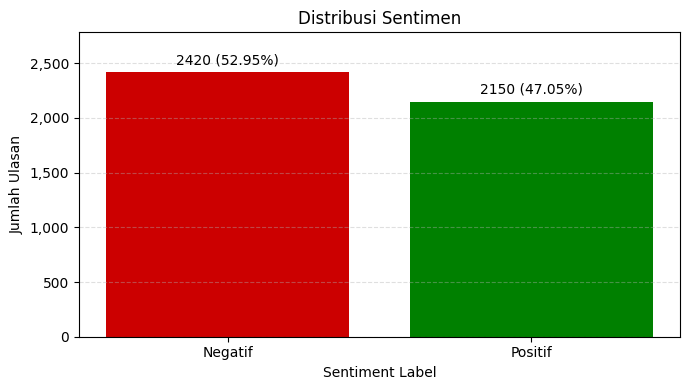

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung distribusi label
dist = df_filtered['sentiment_label'].value_counts().reset_index()
dist.columns = ['sentiment_label', 'jumlah']

# Hitung persentase
dist['persentase'] = (dist['jumlah'] / dist['jumlah'].sum() * 100).round(2)

# Urutkan label
dist = dist.sort_values('sentiment_label')

# Warna khusus:
# Positif = Hijau Muda (#90ee90)
# Negatif = Merah Muda (#ff9999)
colors = dist['sentiment_label'].map({
    'Positif': '#008000',   # hijau gelap
    'Negatif': '#cc0000'    # merah gelap
}).tolist()

# Plot
plt.figure(figsize=(7, 4))
plt.bar(dist['sentiment_label'], dist['jumlah'], color=colors)

# Format angka ribuan
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Grid halus
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Tambah ruang di atas bar
plt.ylim(0, dist['jumlah'].max() * 1.15)

# Label dan judul
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Sentimen')

# Tampilkan angka + persentase
for index, row in dist.iterrows():
    plt.text(index,
             row['jumlah'] + dist['jumlah'].max() * 0.03,
             f"{row['jumlah']} ({row['persentase']}%)",
             ha='center')

plt.tight_layout()
plt.show()

### Konversi Label Teks ke Label Numerik

Bagian kode ini digunakan untuk mengubah label sentimen yang semula berbentuk teks ("Positif" dan "Negatif") menjadi angka (1 dan 0). Model NLP seperti IndoBERT hanya dapat memproses label dalam bentuk numerik, sehingga proses mapping ini wajib dilakukan sebelum training.

In [ ]:
label_mapping = {
    "Positif": 1,
    "Negatif": 0
}

df_filtered['sentiment_encoded'] = df_filtered['sentiment_label'].map(label_mapping)

# Cek hasil 10 data pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,...",-4,Negatif,0
1,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]",-1,Negatif,0
2,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop...",3,Positif,1
3,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ...",-1,Negatif,0
4,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]",-3,Negatif,0
5,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila...",-2,Negatif,0
6,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,...",-3,Negatif,0
7,si byond kendala mulu dah,si byond kendala mulu dah,si byond kendala mulu dah,sih byond masalah mulu sudah,"[sih, byond, masalah, mulu, sudah]","[sih, masalah, mulu]","[sih, masalah, mulu]",-1,Negatif,0
8,@Arisjo @idextratime Kak knp ya hrgany beda sa...,@arisjo @idextratime kak knp ya hrgany beda sa...,kak knp ya hrgany beda sama di byond mana be...,kak kenapa ya hrgany beda sama di byond mana b...,"[kak, kenapa, ya, hrgany, beda, sama, di, byon...","[hrgany, beda, beda, masuk]","[hrgany, beda, beda, masuk]",-3,Negatif,0
9,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,"[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, tau...",-2,Negatif,0


### Contoh 5 Data Positif dan Negatif

In [ ]:
# === Contoh 5 Data Positif ===
contoh_positif = (
    df_filtered[df_filtered['sentiment_encoded'] == 1]
    .head(5)
)

print("=== Contoh Ulasan Positif ===")
display(contoh_positif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])


# === Contoh 5 Data Negatif ===
contoh_negatif = (
    df_filtered[df_filtered['sentiment_encoded'] == 0]
    .head(5)
)

print("=== Contoh Ulasan Negatif ===")
display(contoh_negatif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])

=== Contoh Ulasan Positif ===


,normalisasi,sentiment_label,sentiment_encoded
2,halo min saya melakukan pembayar shopee melalu...,Positif,1
12,menggunakan jaringan internet mobile ya kak di...,Positif,1
13,pergantian makan kakak dapat melakukan transak...,Positif,1
14,dikirimkan sesuai dengan alamat yang terdaftar...,Positif,1
15,selamat pagi saya zidna nasabah bsi ingin memb...,Positif,1


=== Contoh Ulasan Negatif ===


,normalisasi,sentiment_label,sentiment_encoded
0,byond bsi masalah tidak sih gue isi ulang shop...,Negatif,0
1,kalau kasus byond akun kurang copy kak,Negatif,0
3,kak nitip prtnyaan please aku mau mencoba nabu...,Negatif,0
4,min kok aplikasi byond by bsi tidak bisa dibuk...,Negatif,0
5,baik terima kasih omong-omong kartu atm bsi sa...,Negatif,0


### Wordcloud Positif dan Negatif

#### Wordcloud Positif

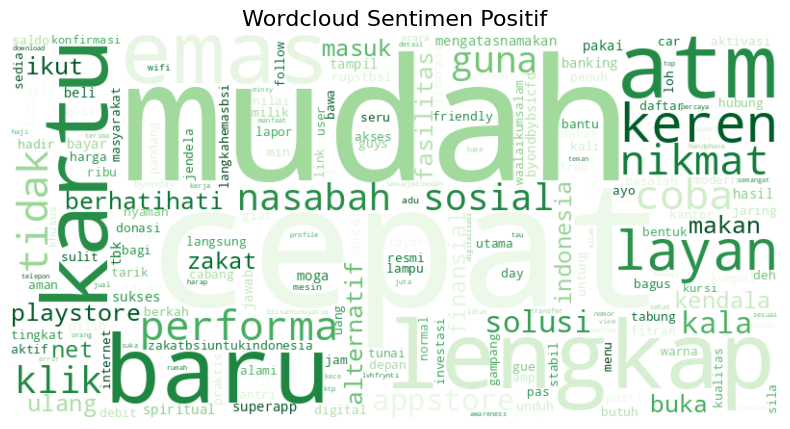

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# --- Stopword tambahan khusus wordcloud ---
stopword_wc = {
    "bsi", "byond", "bank", "syariah",
    "aplikasi", "apk", 'byondbybsi',
    "nya", "juga", "udah",
    "gak", "ga", 'cont',
    "sih", "saja", "aja",
    "untuk", "banget",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update",
    "customer", "service", "cs",
    "fitur", "login", "akun", "email",
    "transaksi", "rekening", "mobile"
}

# Gabungkan dengan stopword bawaan wordcloud
wc_stopwords = STOPWORDS.union(stopword_wc)

# Ambil token dari data POSITIF (hasil stemming)
positive_tokens = df_filtered[df_filtered['sentiment_encoded'] == 1]['stemming']

# Gabungkan semua token menjadi satu string
text_pos = " ".join([" ".join(tokens) for tokens in positive_tokens])

# Buat wordcloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens",     # hijau lembut
    stopwords=wc_stopwords,
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_pos)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Wordcloud Sentimen Positif", fontsize=16)
plt.axis("off")
plt.show()

#### Wordcloud Negatif

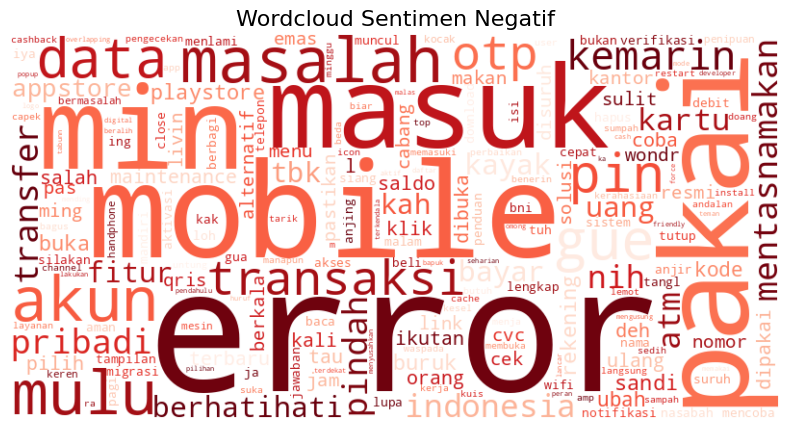

In [ ]:
# === Wordcloud Negatif ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Stopword tambahan khusus wordcloud (hindari kata tidak bermakna)
stopword_wc = {
    "bsi", "byond", "byond!", "bank", "syariah",
    "aplikasi", "apk", 'tidak',
    "nya", "juga", "udah",
    "gak", "ga", "cont",
    "sih", "saja", "aja",
    "untuk", "banget",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update"
}

# Gabungkan token negatif menjadi satu teks panjang
text_neg = " ".join(
    [" ".join(tokens) for tokens in df_filtered[df_filtered['sentiment_encoded'] == 0]['stopword_removal']]
)

# Hapus kata tidak penting
for sw in stopword_wc:
    text_neg = text_neg.replace(sw, "")

# Generate WordCloud negatif
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",       # warna merah lembut → cocok untuk negatif
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_neg)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Wordcloud Sentimen Negatif", fontsize=16)
plt.axis("off")
plt.show()

#### Simpan File Hasil Lexicon

In [ ]:
# Export data yang sudah dimodify ke CSV
df_filtered.to_csv("hasil_lexicon_x.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_lexicon_x.csv'")

✅ File berhasil diekspor sebagai 'hasil_lexicon_x.csv'


## 4.2 Pembagian Dataset (*Train & Test Data Splitting*)

Tahap ini membagi dataset hasil preprocessing menjadi tiga subset, yaitu training set (80%), validation set (10%), dan test set (10%). Proses pembagian dilakukan melalui dua kali stratified sampling untuk menjaga agar proporsi label sentimen tetap seimbang pada setiap subset.

Dengan cara ini, model IndoBERT memperoleh data latih yang representatif, sementara evaluasi akhir pada validation dan test set tetap objektif dan tidak bias terhadap distribusi kelas tertentu.

### Membaca Dataset Hasil Lexicon

In [ ]:
import pandas as pd

df_filtered = pd.read_csv('hasil_lexicon_x.csv')
display(df_filtered[['normalisasi', 'sentiment_label', 'sentiment_encoded']].head())

,normalisasi,sentiment_label,sentiment_encoded
0,byond bsi masalah tidak sih gue isi ulang shop...,Negatif,0
1,kalau kasus byond akun kurang copy kak,Negatif,0
2,halo min saya melakukan pembayar shopee melalu...,Positif,1
3,kak nitip prtnyaan please aku mau mencoba nabu...,Negatif,0
4,min kok aplikasi byond by bsi tidak bisa dibuk...,Negatif,0


In [ ]:
df_filtered['sentiment_encoded'].value_counts()

,count
sentiment_encoded,
0,2420
1,2150


In [ ]:
# Hapus duplikat komentar
df_filtered = df_filtered.drop_duplicates(subset='comment').reset_index(drop=True)

In [ ]:
# Cek NaN
print(df_filtered['sentiment_encoded'].isna().sum())

# Hapus yang NaN
df_filtered = df_filtered.dropna(subset=['sentiment_encoded'])

# Pastikan tipe data benar
df_filtered['sentiment_encoded'] = df_filtered['sentiment_encoded'].astype(int)

0


In [ ]:
# Pastikan tipe data integer (tanpa warning)
df_filtered = df_filtered.copy()  # hindari warning
df_filtered.loc[:, 'sentiment_encoded'] = df_filtered['sentiment_encoded'].astype(int)

### First Split — Train (80%) & Temp (20%)

Kode ini membagi dataset menjadi tiga bagian: data pelatihan 80%, data validasi 10%, dan data pengujian 10%. Pembagian dilakukan dengan metode stratified sampling agar proporsi label positif dan negatif tetap seimbang pada setiap subset. Distribusi label kemudian dicek kembali untuk memastikan pembagian berjalan benar sebelum masuk ke tahap tokenisasi dan pemodelan

In [ ]:
from sklearn.model_selection import train_test_split

# Pastikan df_filtered sudah terload (kalau belum, aktifkan baris di bawah)
# df_filtered = pd.read_csv('label_x.csv')

# 1. Split pertama: Train (80%) dan Temp (20%)
df_train, df_temp = train_test_split(
    df_filtered,
    test_size=0.2,
    random_state=42,
    stratify=df_filtered['sentiment_encoded']   # stratify pakai angka, bukan teks
)

# 2. Split kedua: Temp menjadi Validation (10%) dan Test (10%)
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,   # setengah dari 20% = 10%
    random_state=42,
    stratify=df_temp['sentiment_encoded']       # stratify tetap pakai angka
)

# Verify Dataset Shapes
# Bagian ini mengecek ukuran masing-masing subset untuk memastikan pembagian telah sesuai rasio 80–10–10.
# Print shapes
print("Shape df_train:", df_train.shape)
print("Shape df_val:", df_val.shape)
print("Shape df_test:", df_test.shape)

# Cek distribusi label
print("\nDistribusi label TRAIN:")
print(df_train['sentiment_encoded'].value_counts(normalize=True))

print("\nDistribusi label VAL:")
print(df_val['sentiment_encoded'].value_counts(normalize=True))

print("\nDistribusi label TEST:")
print(df_test['sentiment_encoded'].value_counts(normalize=True))

Shape df_train: (3580, 10)
Shape df_val: (448, 10)
Shape df_test: (448, 10)

Distribusi label TRAIN:
sentiment_encoded
0    0.535754
1    0.464246
Name: proportion, dtype: float64

Distribusi label VAL:
sentiment_encoded
0    0.535714
1    0.464286
Name: proportion, dtype: float64

Distribusi label TEST:
sentiment_encoded
0    0.535714
1    0.464286
Name: proportion, dtype: float64


### Second Split — Validation (10%) & Test (10%)

Sub-subset temp (20%) dipecah lagi menjadi validation dan test dengan rasio 50:50, menghasilkan masing-masing 10% dari total dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Split Train (80%) dan Temp (20%)
df_train, df_temp = train_test_split(
    df_filtered,
    test_size=0.2,
    random_state=42,
    stratify=df_filtered['sentiment_label']
)

# 2. Split Temp menjadi Validation (10%) dan Test (10%)
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,  # setengah dari 20% = 10%
    random_state=42,
    stratify=df_temp['sentiment_label']
)

df_train.shape, df_test.shape, df_val.shape

# Check Label Distribution
# Bagian ini menampilkan persentase label pada train, validation, dan test untuk memastikan stratify berjalan dengan baik dan distribusi tetap seimbang.
df_train['sentiment_label'].value_counts(normalize=True)
df_val['sentiment_label'].value_counts(normalize=True)
df_test['sentiment_label'].value_counts(normalize=True)

,proportion
sentiment_label,
Negatif,0.535714
Positif,0.464286


In [ ]:
train_texts = set(df_train['comment'])
test_texts = set(df_test['comment'])

overlap = train_texts.intersection(test_texts)

print("Jumlah data yang sama di train & test:", len(overlap))

Jumlah data yang sama di train & test: 0


## 4.3 Inisialisasi Model & Pengaturan Tokenizer

Tahap ini bertujuan menyiapkan pre-trained model IndoBERT yang akan digunakan untuk proses fine-tuning. Proses dimulai dengan menentukan model dasar (IndoBERT-base-p2), memuat tokenizer-nya, serta melakukan analisis awal seperti distribusi token length untuk menentukan nilai max_length yang aman sebelum masuk ke tahap tokenisasi dan pembuatan dataset HuggingFace.

#### Pemilihan Pre-trained Model IndoBERT

Bagian ini memilih model dasar yang akan digunakan untuk fine-tuning. Kamu menggunakan IndoBERT-base-p2, model umum untuk tugas klasifikasi teks Bahasa Indonesia.

In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co
# Tentukan pre-trained model (SETELAH split dataset)

PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'  # https://huggingface.co/indobenchmark/indobert-base-p2

#### Inisialisasi Tokenizer & Model Classification

Tokenizer bertugas mengubah teks menjadi token sesuai format IndoBERT.
Model diinisialisasi dengan jumlah label = 2 (positif & negatif).

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL)

model = AutoModelForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL,
    num_labels=2  # karena hanya positif & negatif
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Analisis Token Length (Menentukan max_length)

Bagian ini menghitung panjang token setiap kalimat untuk memastikan nilai max_length tidak terlalu kecil atau berlebihan.
1. Kalau max < 128 → 128 aman.
2. Kalau max 150 → kamu bisa naikan ke 160 atau 192.
3. Tapi 128 tetap recommended.

In [ ]:
lengths = df_filtered['normalisasi'].fillna('').apply(lambda x: len(tokenizer.tokenize(x)))
lengths.describe()

,normalisasi
count,4476.000000
mean,27.083333
std,13.782070
min,4.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,83.000000


### Pembuatan Fungsi Tokenisasi (tokenize())

Tahap ini mendefinisikan fungsi tokenisasi yang akan digunakan oleh HuggingFace Dataset untuk mengubah setiap teks pada kolom normalisasi menjadi format numerik yang dapat diproses oleh model IndoBERT. Proses ini menghasilkan dua komponen penting:
1.   input_ids: representasi numerik dari token hasil pemetaan tokenizer.
2.   attention_mask: penanda token mana yang perlu diperhatikan model (1) dan mana yang hanya padding (0).

Fungsi ini menerapkan padding dan truncation secara konsisten memakai max_length=160, sehingga seluruh input memiliki panjang seragam tanpa kehilangan informasi signifikan. Tahap tokenisasi ini wajib sebelum dataset diubah menjadi tensor untuk proses training IndoBERT.

In [ ]:
def tokenize(batch):
    return tokenizer(
        batch["normalisasi"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

### Konversi DataFrame ke HuggingFace Dataset & Encoding Label

Deskripsi Singkat (untuk 1 kolom Colab)

Tahap ini mengubah dataset yang sebelumnya masih dalam bentuk pandas DataFrame menjadi format HuggingFace Dataset, yang lebih efisien untuk proses tokenisasi, batching, dan training dengan Trainer API. Setelah itu dilakukan pemetaan label sentimen dari bentuk string ("Positif"/"Negatif") menjadi format numerik (1/0) agar dapat diproses oleh model IndoBERT selama training.

Langkah inti pada tahap ini meliputi:
1. Konversi DataFrame → Dataset (Dataset.from_pandas)
2. Pemetaan label string menjadi angka menggunakan fungsi encode_label
3. Persiapan dataset agar kompatibel dengan Trainer sebelum masuk tahap tokenisasi

In [ ]:
# Convert pandas → HuggingFace Dataset
from datasets import Dataset

train_dataset = Dataset.from_pandas(df_train)
val_dataset   = Dataset.from_pandas(df_val)
test_dataset  = Dataset.from_pandas(df_test)

# Mapping label ke angka
label2id = {"Positif": 1, "Negatif": 0}
id2label = {1: "Positif", 0: "Negatif"}

def encode_label(example):
    example["label"] = label2id[example["sentiment_label"]]
    return example

# Terapkan mapping ke semua subset
train_dataset = train_dataset.map(encode_label)
val_dataset   = val_dataset.map(encode_label)
test_dataset  = test_dataset.map(encode_label)

Map:   0%|          | 0/3580 [00:00<?, ? examples/s]

Map:   0%|          | 0/448 [00:00<?, ? examples/s]

Map:   0%|          | 0/448 [00:00<?, ? examples/s]

###Tokenisasi dataset

1. Proses Tokenisasi Teks → Token BERT
Tahap ini menjalankan fungsi tokenize() untuk mengubah setiap kalimat menjadi dua komponen penting, yaitu input_ids dan attention_mask. Prosesnya dilakukan secara batched agar lebih efisien untuk pemrosesan jumlah data besar.

2. Penghapusan Kolom Teks Asli & Label String
Setelah tokenisasi selesai, kolom teks mentah (normalisasi) dan label berbentuk teks (sentiment_label) dihapus. Dataset hanya menyisakan komponen tensor yang dibutuhkan pada proses fine-tuning IndoBERT.

3. Penyesuaian Kolom Label Numerik
Kolom label hasil encoding (sentiment_encoded) diganti namanya menjadi labels agar sesuai dengan standar input Trainer API pada library Transformers.

In [ ]:
# Tokenisasi dataset
train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset   = val_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

# Remove kolom text & label string
train_dataset = train_dataset.remove_columns(["normalisasi", "sentiment_label"])
val_dataset   = val_dataset.remove_columns(["normalisasi", "sentiment_label"])
test_dataset  = test_dataset.remove_columns(["normalisasi", "sentiment_label"])

# Rename kolom label numerik ke 'labels'
train_dataset = train_dataset.rename_column("sentiment_encoded", "labels")
val_dataset   = val_dataset.rename_column("sentiment_encoded", "labels")
test_dataset  = test_dataset.rename_column("sentiment_encoded", "labels")

Map:   0%|          | 0/3580 [00:00<?, ? examples/s]

Map:   0%|          | 0/448 [00:00<?, ? examples/s]

Map:   0%|          | 0/448 [00:00<?, ? examples/s]

### Training Arguments Setup

Bagian ini mengatur seluruh parameter proses fine-tuning, seperti learning rate, batch size, jumlah epoch, strategi evaluasi dan penyimpanan model, serta metrik utama yang digunakan untuk memilih model terbaik. Semua pengaturan ini mempengaruhi performa dan stabilitas proses training IndoBERT.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./indobert-sentiment",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

### Definisikan Fungsi Compute Metrics

Bagian ini mendefinisikan fungsi evaluasi yang digunakan selama proses training dan validation. Fungsi ini menghitung metrik utama seperti accuracy, precision, recall, dan F1-score dengan pendekatan weighted, sehingga tetap adil meskipun distribusi label tidak seimbang. Nilai-nilai ini membantu mengukur kualitas prediksi model IndoBERT secara komprehensif.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='weighted'
    )
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

### Inisialisasi Trainer

Tahap ini menginisialisasi objek Trainer, yaitu modul dari HuggingFace yang menangani seluruh proses training, evaluasi, logging, dan model checkpointing. Pada bagian ini, model IndoBERT, dataset yang telah ditokenisasi, set parameter training, serta fungsi metrik digabungkan menjadi satu pipeline siap latih.

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,  # Model IndoBERT Anda yang sudah didefinisikan sebelumnya
    args=training_args,
    train_dataset=train_dataset,  # Dataset training yang sudah di-tokenize
    eval_dataset=val_dataset,  # Dataset validasi yang sudah di-tokenize
    compute_metrics=compute_metrics
)

## 4.5 *Fine-Tuning*

Bagian ini menjalankan proses fine-tuning pada model IndoBERT menggunakan dataset training dan mengevaluasi performanya pada validation set setiap epoch. Setelah training selesai, Trainer otomatis memuat model terbaik berdasarkan metrik F1-score.

In [ ]:
# Training model
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: wicaksonobay (wicaksonobay-uin-jakarta) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.303800,0.170911,0.928571,0.928520,0.928617,0.928571
2,0.144500,0.179156,0.948661,0.948590,0.948988,0.948661
3,0.050900,0.219880,0.957589,0.957550,0.957751,0.957589
4,0.016100,0.237788,0.955357,0.955306,0.955601,0.955357


TrainOutput(global_step=896, training_loss=0.1288174566413675, metrics={'train_runtime': 379.7263, 'train_samples_per_second': 37.711, 'train_steps_per_second': 2.36, 'total_flos': 941937578188800.0, 'train_loss': 0.1288174566413675, 'epoch': 4.0})

In [ ]:
df_filtered['sentiment_encoded'].value_counts()

,count
sentiment_encoded,
0,2398
1,2078


### Simpan Model

Menyimpan model dan tokenizer yang sudah dilatih agar bisa digunakan kembali tanpa perlu melatih ulang.

In [ ]:
# Simpan model
trainer.save_model("./indobert-sentiment-x")

# Atau simpan secara manual
model.save_pretrained("./indobert-sentiment-x")
tokenizer.save_pretrained("./indobert-sentiment-x")

('./indobert-sentiment-x/tokenizer_config.json',
 './indobert-sentiment-x/special_tokens_map.json',
 './indobert-sentiment-x/vocab.txt',
 './indobert-sentiment-x/added_tokens.json',
 './indobert-sentiment-x/tokenizer.json')

### Mount Google Drive

Menghubungkan Google Colab dengan Google Drive agar file dapat disimpan atau diakses secara langsung.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Salin ke Drive

Menyalin folder model yang sudah disimpan ke Google Drive agar tersimpan permanen.

In [ ]:
!cp -r indobert-sentiment-x /content/drive/MyDrive/

### Cek File di Drive

Menampilkan isi folder Google Drive untuk memastikan model sudah berhasil disalin.

In [ ]:
!ls /content/drive/MyDrive/

'Colab Notebooks'	     indobert-sentiment-x
 indobert-sentiment-tiktok  'Zoom sanul sempro'


## 4.6 Implementasi Model Untuk Prediksi

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Load Model dan Tokenizer

Memuat model IndoBERT yang sudah dilatih beserta tokenizer-nya dari Google Drive untuk siap digunakan melakukan prediksi.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/indobert-sentiment-x"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

#### Fungsi Prediksi Sentimen

Mendefinisikan fungsi predict yang menerima teks input, melakukan tokenization, inferensi model, menghitung probabilitas dengan softmax, dan mengembalikan label prediksi beserta tingkat keyakinannya.

In [ ]:
import torch

def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128, padding=True)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}   # <- penting
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)
        label = torch.argmax(probs, dim=1).item()
        conf = probs[0][label].item()
    return label, conf

#### Contoh Prediksi

Menguji fungsi predict dengan satu contoh teks dan menampilkan hasil label dan tingkat keyakinannya.

In [ ]:
predict("BYOND makin mantap aja ini aplikasinya")

(1, 0.9976033568382263)

# 📊 5. Asess

## 5.1 Evaluasi Performa Model

Mengevaluasi performa model pada validation set dan test set untuk melihat akurasi, loss, dan metrik lainnya.

In [ ]:
import pandas as pd

# Evaluasi pada validation set
eval_results = trainer.evaluate()

# Evaluasi pada test set
test_results = trainer.evaluate(test_dataset)

# Menggabungkan hasil ke dalam satu tabel
df_results = pd.DataFrame([
    {"Set": "Validation", **eval_results},
    {"Set": "Test", **test_results}
])

# Menampilkan tabel
df_results

,Set,eval_loss,eval_accuracy,eval_f1,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,Validation,0.219880,0.957589,0.957550,0.957751,0.957589,2.9082,154.049,9.628,4.0
1,Test,0.301479,0.935268,0.935234,0.935284,0.935268,2.8690,156.153,9.760,4.0


## 5.2 Confusion Matrix

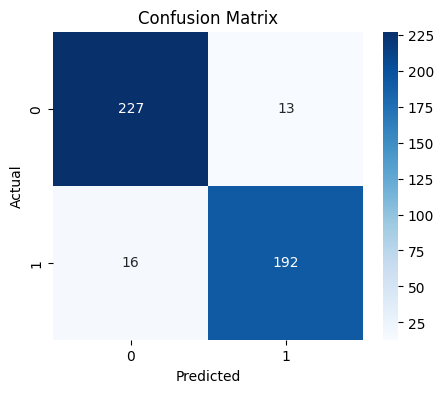

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dapatkan prediksi untuk test set
pred_test = trainer.predict(test_dataset)
y_true = pred_test.label_ids
y_pred = pred_test.predictions.argmax(-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 5.3 Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9342    0.9458    0.9400       240
           1     0.9366    0.9231    0.9298       208

    accuracy                         0.9353       448
   macro avg     0.9354    0.9345    0.9349       448
weighted avg     0.9353    0.9353    0.9352       448



## 5.4 ROC Curve & AUC


AUC Score (softmax): 0.9845


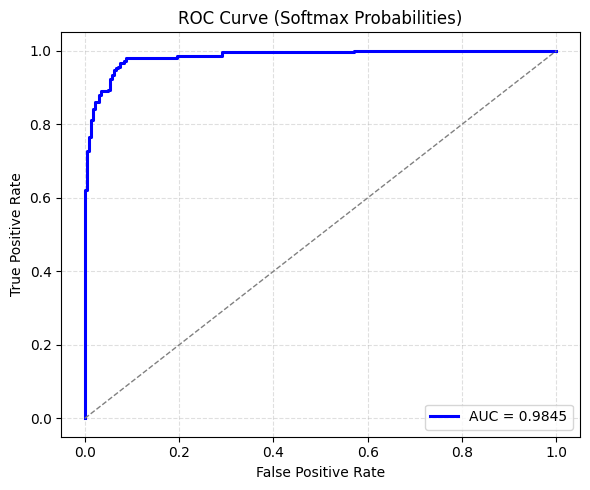

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy.special import softmax
import matplotlib.pyplot as plt
import numpy as np

# Convert logits → probabilitas dengan softmax
logits = pred_test.predictions
probs = softmax(logits, axis=1)
probs_positive = probs[:, 1]  # Probabilitas kelas positif

# Hitung ROC
fpr, tpr, _ = roc_curve(y_true, probs_positive)
roc_auc = auc(fpr, tpr)

# Tampilkan nilai AUC di output
print(f"AUC Score (softmax): {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(
    fpr, tpr,
    color='blue',
    linewidth=2.2,
    markersize=4,
    label=f"AUC = {roc_auc:.4f}"
)

# Garis diagonal pembanding
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Softmax Probabilities)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
train_texts = set(df_train['comment'])
test_texts = set(df_test['comment'])

overlap = train_texts.intersection(test_texts)

print("Jumlah data yang sama di train & test:", len(overlap))

Jumlah data yang sama di train & test: 0


In [ ]:
import numpy as np

print(pred_test.predictions[:5])  # lihat bentuknya

[[ 3.8707354 -3.8726168]
 [ 3.9107187 -3.7751272]
 [ 3.942085  -3.789685 ]
 [ 2.9833403 -3.1723297]
 [ 1.9413487 -1.5819706]]


In [ ]:
print(len(y_true), len(pred_test.predictions))

448 448


## 5.5 Distribusi Hasil Sentimen

Notebook ini digunakan untuk melakukan **klasifikasi sentimen** menggunakan model **IndoBERT yang telah di-fine-tune**. Analisis ini bertujuan untuk mengetahui **proporsi hasil prediksi** pada tiga kelas sentimen: *Negative, Neutral,* dan *Positive*, serta memvisualisasikannya dalam bentuk diagram batang.

Tujuan utama dari notebook ini adalah untuk:
- Mengevaluasi distribusi sentimen setelah proses **fine-tuning**.
- Menampilkan hasil dalam bentuk **persentase dan grafik batang**.
- Mengekspor **data pelatihan (fine-tuning)** ke file CSV untuk dokumentasi dan analisis lanjutan.


In [ ]:
# 1. LOAD DATASET

import pandas as pd

# File CSV kamu
file_path = "hasil_lexicon_x.csv"   # pastikan nama file sesuai
df = pd.read_csv(file_path)

# Cek kolom normalisasi
df['normalisasi'].head()

,normalisasi
0,byond bsi masalah tidak sih gue isi ulang shop...
1,kalau kasus byond akun kurang copy kak
2,halo min saya melakukan pembayar shopee melalu...
3,kak nitip prtnyaan please aku mau mencoba nabu...
4,min kok aplikasi byond by bsi tidak bisa dibuk...


Load Model IndoBERT

In [ ]:
# 2. LOAD MODEL INDOBERT (2 KELAS)

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_path = "/content/drive/MyDrive/indobert-sentiment-x"  # model kamu

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# 3. FUNGSI PREDIKSI INDOBERT

def predict_sentiment(text):
    # Tokenisasi
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)

    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()  # 0 = negatif, 1 = positif
    return pred

In [ ]:
# 4. GENERATE LABEL BARU (bert_label & bert_encoded)

# Prediksi tiap baris berdasarkan kolom normalisasi
df["bert_encoded"] = df["normalisasi"].fillna("").apply(predict_sentiment)

# Mapping angka → teks
mapping = {0: "negatif", 1: "positif"}
df["bert_label"] = df["bert_encoded"].map(mapping)

df[["normalisasi", "bert_encoded", "bert_label"]].head()

,normalisasi,bert_encoded,bert_label
0,byond bsi masalah tidak sih gue isi ulang shop...,0,negatif
1,kalau kasus byond akun kurang copy kak,0,negatif
2,halo min saya melakukan pembayar shopee melalu...,1,positif
3,kak nitip prtnyaan please aku mau mencoba nabu...,0,negatif
4,min kok aplikasi byond by bsi tidak bisa dibuk...,0,negatif


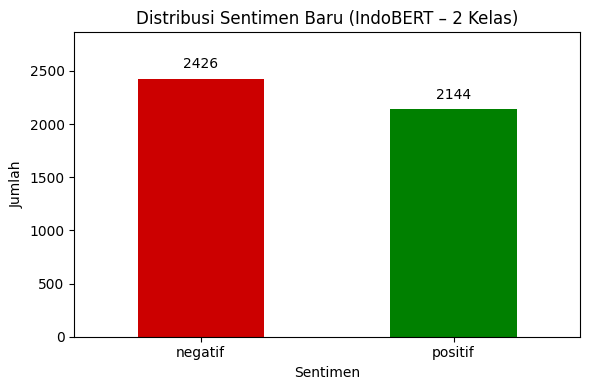

In [ ]:
# 6. PLOT DISTRIBUSI SENTIMEN (MATPLOTLIB) — FIXED KeyError

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

counts = df["bert_label"].value_counts()

# Mapping warna aman untuk semua format huruf
color_map = {
    "positif": "#008000",
    "negatif": "#cc0000",
}

# Siapkan warna tanpa error
bar_colors = [color_map.get(label, "#808080") for label in counts.index]

ax = counts.plot(kind="bar", color=bar_colors)

# Tambahkan angka di atas batang
for i, value in enumerate(counts):
    ax.text(i, value + (value * 0.03), str(value),
            ha='center', va='bottom', fontsize=10)

# Perbesar sumbu Y agar label tidak bertabrakan
max_val = counts.max()
plt.ylim(0, max_val * 1.18)

plt.title("Distribusi Sentimen Baru (IndoBERT – 2 Kelas)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# 5. SIMPAN DATA HASIL (OPSIONAL)
df.to_csv("label_indobert_x.csv", index=False)

# 🧩 6. Analisis Lanjutan Menggunakan BERTopic (X)

## Instalasi Library

In [ ]:
!pip install bertopic[all] umap-learn hdbscan Sastrawi
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.3 MB/s eta 0:00:00


## Import Library & Inisialisasi

In [ ]:
from bertopic import BERTopic
import pandas as pd
import matplotlib.pyplot as plt
import re

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


### Memanggil Dataset Tiktok

In [ ]:
# Load CSV lokal
file_path = "/content/label_indobert_x.csv"  # pastikan path sesuai lokasi file
df = pd.read_csv(file_path)
df.head()

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded,bert_encoded,bert_label
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"['byond', 'bsi', 'masalah', 'tidak', 'sih', 'g...","['masalah', 'tidak', 'sih', 'gue', 'isi', 'ula...","['masalah', 'tidak', 'sih', 'gue', 'isi', 'ula...",-4,Negatif,0,0,negatif
1,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"['kalau', 'kasus', 'byond', 'akun', 'kurang', ...","['akun', 'kurang', 'copy']","['akun', 'kurang', 'copy']",-1,Negatif,0,0,negatif
2,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"['halo', 'min', 'saya', 'melakukan', 'pembayar...","['min', 'pembayar', 'shopee', 'kali', 'statusn...","['min', 'bayar', 'shopee', 'kali', 'status', '...",3,Positif,1,1,positif
3,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"['kak', 'nitip', 'prtnyaan', 'please', 'aku', ...","['nitip', 'prtnyaan', 'please', 'mencoba', 'na...","['nitip', 'prtnyaan', 'please', 'coba', 'nabun...",-1,Negatif,0,0,negatif
4,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"['min', 'kok', 'aplikasi', 'byond', 'by', 'bsi...","['min', 'aplikasi', 'tidak', 'dibuka', 'siang'...","['min', 'aplikasi', 'tidak', 'buka', 'siang', ...",-3,Negatif,0,0,negatif


In [ ]:
df_positif = df[df["bert_label"] == "positif"].copy()
print("Jumlah Ulasan Positif:", len(df_positif))

Jumlah Ulasan Positif: 2144


In [ ]:
df_negatif = df[df["bert_label"] == "negatif"].copy()
print("Jumlah Ulasan Negatif:", len(df_negatif))

Jumlah Ulasan Negatif: 2426


## Positif

In [ ]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- stopword dasar dari Sastrawi ---
factory = StopWordRemoverFactory()
base_stopwords = set(factory.get_stop_words())

# --- stopword tambahan untuk data TikTok (super lengkap) ---
extra_stopwords = {
    # kata panggilan
    "kak", "kakak", "bang", "bro", "sis", "bos", "min", "admin",

    # nama aplikasi & banking
    "bsi", "byond", "beyond", "wondr", "bni", "mbanking", "mobile", "bank", "byondbybsi", "beyondbsii",

    # kata bantu umum yang tidak bermakna topik
    "bisa", "tidak", "ga", "gak", "gk", "nggak", "ngga", "enggak",
    "iya", "kayak", "gua", "gue", "aku", "kamu", "anda", "mereka",
    "saya", "mau", "udah", "lagi", "yang", "dengan", "agar", "jadi",

    # kata noise umum TikTok
    "anjir", "anjay", "banget", "parah", "loh", "lah", "kok", "sih",
    "wkwk", "wkwkwk", "hehe", "haha", "hmm",

    # corporate / lokasi bias
    "tbk", "pt", "aceh", "indonesia",

    # Tambahan kata umum lainnya
    "hari", "kalau", "cont", "silakan", "lalu", "menggunakan", "pastikan", "restart", "selalu", "playstore", "appstore", "berbagi", "keren", "bekerjasama", "outlet", "dilihat", "terupdate", "diharapkam",
    "berhatihati", "jaga", "mengatasnamakan", "mohon", "versi", "pribadi", "syariah", "paham", "jadi", "berkah", "ikutan", "icon", " jawabannya", "logo", " ialah", "update", "coba", "melakukan",
    "waalaikumsalam", " kuisnya", "minsy", "kali", "mluu", "mint", "enih", "guys", "info", "begini", "mohon", "kata", "terbaru", "memberikan", "pihak", "waspada", "himbau", "stabil", "overlapping",
    "menjaga", "keharasiaan", "manapun", " ", "diperbarui", "terlebih", "kuis", "jawaban", "follow", "rezeki", "bestie", "pahamjadiberkah", "jangan", "klik", "link", "resmi", "benar", "menindaklanjuti",
    "bsisantuniyatim", "allah", "langkahemasbsi", "byondbybsicfd", "rupstbsi", "amil", "byonday", "zakatbsiuntukindonesia", "spiritual",
}

# gabungkan semua stopword
all_stopwords = base_stopwords.union(extra_stopwords)

# --- CLEANING SUPER KOMPREHENSIF UNTUK BERTopic ---
def clean_bertopic_pos(text):
    text = str(text).lower()

    # hapus URL, @mention, hashtag
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", " ", text)

    # hapus karakter selain huruf/angka/spasi
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)

    # hapus kata 1–3 huruf (mengurangi bias X)
    text = re.sub(r"\b\w{1,3}\b", " ", text)

    # stopword filter
    tokens = [w for w in text.split() if w not in all_stopwords]

    return " ".join(tokens).strip()

In [ ]:
df_positif["clean_text"] = df_positif["normalisasi"].apply(clean_bertopic_pos)
df_positif[["normalisasi", "clean_text"]].head()

,normalisasi,clean_text
2,halo min saya melakukan pembayar shopee melalu...,halo pembayar shopee melalui statusnya pembaya...
12,menggunakan jaringan internet mobile ya kak di...,jaringan internet dikarenakan terpantau normal...
13,pergantian makan kakak dapat melakukan transak...,pergantian makan transaksi banking mendaftar i...
14,dikirimkan sesuai dengan alamat yang terdaftar...,dikirimkan sesuai alamat terdaftar rekening pi...
15,selamat pagi saya zidna nasabah bsi ingin memb...,selamat pagi zidna nasabah membuat pengaduan t...


In [ ]:
# 5. EMBEDDING MODEL TERBAIK
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

In [ ]:
# 6. BERTopic MODEL

topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=70,     # cluster minimal agar topik stabil
    nr_topics="3"       # otomatis menentukan jumlah topik
)

topics, probs = topic_model.fit_transform(df_positif["clean_text"])

df_positif["topic"] = topics

In [ ]:
# 7. TOPIC INFO

topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,268,-1_alternatif_berkala_mengklik_membuka,"[alternatif, berkala, mengklik, membuka, terke...",[sarankan mengklik membuka ulang masuk apabila...
1,0,1498,0_transaksi_lebih_melalui_layanan,"[transaksi, lebih, melalui, layanan, zakat, fi...",[berkala transaksi kartu debit mengalami masal...
2,1,157,1_lebih_performa_cepat_lengkap,"[lebih, performa, cepat, lengkap, sekarang, fi...",[nikmati performa lebih cepat fitur lebih leng...
3,2,136,2_emas_investasi_beli_harga,"[emas, investasi, beli, harga, pembelian, maki...",[emas menawarkan harga kompetitif emas antam p...
4,3,85,3_nilai_utama_finansial_sosial,"[nilai, utama, finansial, sosial, kebutuhan, t...",[hadir tiga nilai utama memenuhi semua kebutuh...


In [ ]:
# 8. PRINT KEYWORDS PER TOPIK

print("=== Keywords for All Topics ===")
for topic_id in topic_info["Topic"]:
    if topic_id == -1:   # skip outlier jika mau
        continue
    print(f"\nTOPIC {topic_id}")
    print(topic_model.get_topic(topic_id))

=== Keywords for All Topics ===

TOPIC 0
[('transaksi', np.float64(0.06044327761307169)), ('lebih', np.float64(0.04380784081211134)), ('melalui', np.float64(0.03899557931858297)), ('layanan', np.float64(0.03581438933948323)), ('zakat', np.float64(0.03489466735080614)), ('fitur', np.float64(0.03372605007809761)), ('buat', np.float64(0.033455154757210975)), ('superapp', np.float64(0.031341319984485826)), ('mudah', np.float64(0.029042654839741344)), ('aplikasi', np.float64(0.029016834781343596))]

TOPIC 1
[('lebih', np.float64(0.36628434941098575)), ('performa', np.float64(0.2679225309762411)), ('cepat', np.float64(0.24618462128584634)), ('lengkap', np.float64(0.24586772358779047)), ('sekarang', np.float64(0.22002004646256995)), ('fitur', np.float64(0.2188656591726858)), ('nikmati', np.float64(0.2118133221063705)), ('menghubungi', np.float64(0.061591790076286713)), ('lanjut', np.float64(0.05579954320519713)), ('melalui', np.float64(0.052614381161856724))]

TOPIC 2
[('emas', np.float64(0.3

In [ ]:
# 1. Define custom topic names (khusus untuk data positif)
custom_labels = {
    0: "Kemudahan Transaksi & Kualitas Layanan Digital",
    1: "Performa Aplikasi & Pengalaman Pengguna",
    2: "Layanan Investasi Emas & Fitur Keuangan",
    3: "Nilai Manfaat Aplikasi & Pemenuhan Kebutuhan Pengguna"
}

# 2. Apply rename to topic model
topic_model.set_topic_labels(custom_labels)

# 3. Print renamed topics + keywords
print("\n=== TOPIK & KEYWORDS POSITIF SETELAH RENAME ===")
for topic_id, keywords in topic_model.get_topics().items():
    if topic_id == -1:
        continue
    print(f"\nTOPIC {topic_id} — {custom_labels[topic_id]}")
    print(keywords)

# 4. Mapping ke Aspek Penelitian
aspek_mapping = {
    0: "Aspek Positif 1: Kemudahan Transaksi & Kualitas Layanan Digital",
    1: "Aspek Positif 2: Performa Sistem & Pengalaman Pengguna",
    2: "Aspek Positif 3: Layanan Investasi Berbasis Emas",
    3: "Aspek Positif 4: Nilai Manfaat Aplikasi & Pemenuhan Kebutuhan Pengguna"
}

print("\n=== ASPEK PER TOPIK POSITIF ===")
for topic_id, aspek in aspek_mapping.items():
    print(f"TOPIC {topic_id} → {aspek}")


=== TOPIK & KEYWORDS POSITIF SETELAH RENAME ===

TOPIC 0 — Kemudahan Transaksi & Kualitas Layanan Digital
[('transaksi', np.float64(0.06044327761307169)), ('lebih', np.float64(0.04380784081211134)), ('melalui', np.float64(0.03899557931858297)), ('layanan', np.float64(0.03581438933948323)), ('zakat', np.float64(0.03489466735080614)), ('fitur', np.float64(0.03372605007809761)), ('buat', np.float64(0.033455154757210975)), ('superapp', np.float64(0.031341319984485826)), ('mudah', np.float64(0.029042654839741344)), ('aplikasi', np.float64(0.029016834781343596))]

TOPIC 1 — Performa Aplikasi & Pengalaman Pengguna
[('lebih', np.float64(0.36628434941098575)), ('performa', np.float64(0.2679225309762411)), ('cepat', np.float64(0.24618462128584634)), ('lengkap', np.float64(0.24586772358779047)), ('sekarang', np.float64(0.22002004646256995)), ('fitur', np.float64(0.2188656591726858)), ('nikmati', np.float64(0.2118133221063705)), ('menghubungi', np.float64(0.061591790076286713)), ('lanjut', np.flo

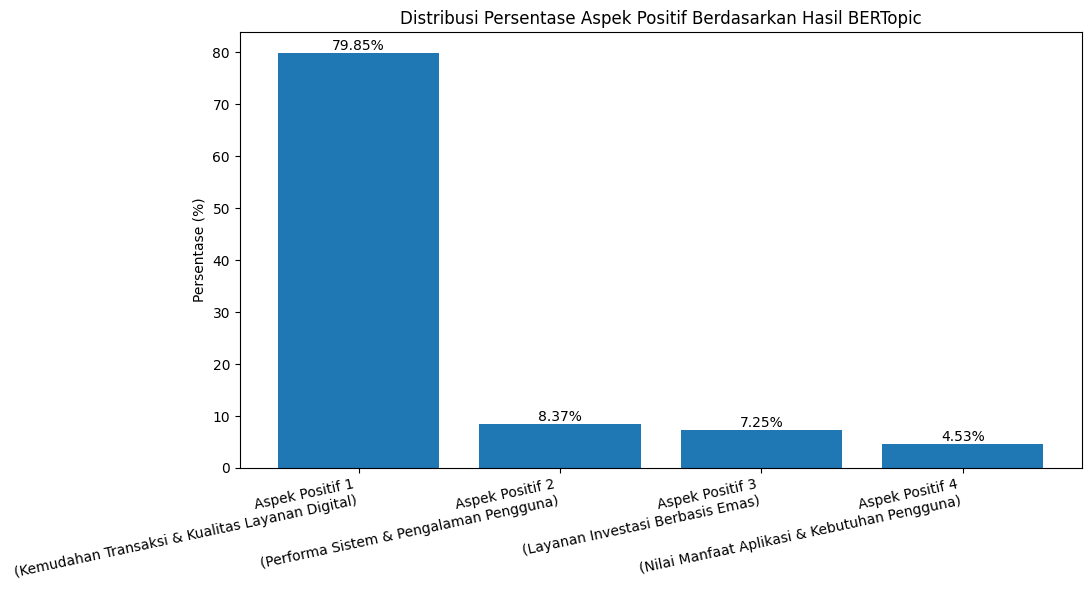

In [ ]:
import matplotlib.pyplot as plt

# === DATA TOPIK POSITIF (tanpa topik -1) ===
topic_counts = {
    "Aspek Positif 1\n(Kemudahan Transaksi & Kualitas Layanan Digital)": 1498,   # Topic 0
    "Aspek Positif 2\n(Performa Sistem & Pengalaman Pengguna)": 157,            # Topic 1
    "Aspek Positif 3\n(Layanan Investasi Berbasis Emas)": 136,                  # Topic 2
    "Aspek Positif 4\n(Nilai Manfaat Aplikasi & Kebutuhan Pengguna)": 85       # Topic 3
}

# === HITUNG PERSENTASE ===
total = sum(topic_counts.values())
percentages = {k: (v / total) * 100 for k, v in topic_counts.items()}

# === VISUALISASI DIAGRAM BATANG ===
plt.figure(figsize=(11, 6))

bars = plt.bar(
    list(percentages.keys()),
    list(percentages.values())
)

# Label
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Aspek Positif Berdasarkan Hasil BERTopic")
plt.xticks(rotation=12, ha='right')

# Tambahkan label persentase di atas batang
for bar, perc in zip(bars, percentages.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{perc:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


## Negatif

In [ ]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- stopword dasar dari Sastrawi ---
factory = StopWordRemoverFactory()
base_stopwords = set(factory.get_stop_words())

# --- stopword tambahan untuk data TikTok (super lengkap) ---
extra_stopwords = {
    # kata panggilan
    "kak", "kakak", "bang", "bro", "sis", "bos", "min", "admin",

    # nama aplikasi & banking
    "bsi", "byond", "beyond", "wondr", "bni", "mbanking", "mobile", "bank", "byondbybsi", "beyondbsii",

    # kata bantu umum yang tidak bermakna topik
    "bisa", "tidak", "ga", "gak", "gk", "nggak", "ngga", "enggak",
    "iya", "kayak", "gua", "gue", "aku", "kamu", "anda", "mereka",
    "saya", "mau", "udah", "lagi", "yang", "dengan", "agar", "jadi",

    # kata noise umum TikTok
    "anjir", "anjay", "banget", "parah", "loh", "lah", "kok", "sih",
    "wkwk", "wkwkwk", "hehe", "haha", "hmm",

    # corporate / lokasi bias
    "tbk", "pt", "aceh", "indonesia",

    # Tambahan kata umum lainnya
    "hari", "kalau", "cont", "silakan", "lalu", "menggunakan", "pastikan", "restart", "selalu", "playstore", "appstore", "berbagi", "keren", "bekerjasama", "outlet", "dilihat", "terupdate",
    "berhatihati", "jaga", "mengatasnamakan", "mohon", "versi", "pribadi", "syariah", "paham", "jadi", "berkah", "ikutan", "icon", " jawabannya", "logo", " ialah", "update", "coba", "melakukan",
    "waalaikumsalam", " kuisnya", "minsy", "kali", "mluu", "mint", "enih", "guys", "info", "begini", "mohon", "kata", "terbaru", "memberikan", "pihak", "waspada", "himbau", "stabil", "overlapping",
    "menjaga", "keharasiaan", "manapun", " ", "diperbarui", "terlebih", "kuis", "jawaban", "follow", "rezeki", "bestie", "pahamjadiberkah", "jangan", "klik", "link", "resmi", "benar", "menindaklanjuti",
}

# gabungkan semua stopword
all_stopwords = base_stopwords.union(extra_stopwords)

# --- CLEANING SUPER KOMPREHENSIF UNTUK BERTopic ---
def clean_bertopic(text):
    text = str(text).lower()

    # hapus URL, @mention, hashtag
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", " ", text)

    # hapus karakter selain huruf/angka/spasi
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)

    # hapus kata 1–3 huruf (mengurangi bias X)
    text = re.sub(r"\b\w{1,3}\b", " ", text)

    # stopword filter
    tokens = [w for w in text.split() if w not in all_stopwords]

    return " ".join(tokens).strip()

In [ ]:
df_negatif["clean_text"] = df_negatif["normalisasi"].apply(clean_bertopic)
df_negatif[["normalisasi", "clean_text"]].head()

,normalisasi,clean_text
0,byond bsi masalah tidak sih gue isi ulang shop...,masalah ulang shopay menit disuruh menunggu ma...
1,kalau kasus byond akun kurang copy kak,kasus akun kurang copy
3,kak nitip prtnyaan please aku mau mencoba nabu...,nitip prtnyaan please mencoba nabung emas hrga...
4,min kok aplikasi byond by bsi tidak bisa dibuk...,aplikasi dibuka siang makan
5,baik terima kasih omong-omong kartu atm bsi sa...,baik terima kasih omong omong kartu hilang buk...


In [ ]:
# 5. EMBEDDING MODEL TERBAIK
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

OutOfMemoryError: CUDA out of memory. Tried to allocate 734.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 698.12 MiB is free. Process 6760 has 14.06 GiB memory in use. Of the allocated memory 13.48 GiB is allocated by PyTorch, and 468.79 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# 6. BERTopic MODEL

topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=40,     # cluster minimal agar topik stabil
    nr_topics="4"       # otomatis menentukan jumlah topik
)

topics, probs = topic_model.fit_transform(df_negatif["clean_text"])

df_negatif["topic"] = topics

In [ ]:
# 7. TOPIC INFO

topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,255,-1_data_sekarang_alternatif_lebih,"[data, sekarang, alternatif, lebih, anjing, le...",[transaksi melalui aplikasi mengalami masalah ...
1,0,2083,0_aplikasi_error_pakai_akun,"[aplikasi, error, pakai, akun, mulu, terus, ma...","[aplikasi error, aplikasi error, aplikasi error]"
2,1,44,1_aplikasi_cache_handphone_force,"[aplikasi, cache, handphone, force, hapus, tut...",[mendatapati masalah lakukan langkah berikut f...
3,2,44,2_penipuan_kerahasiaan_kode_data,"[penipuan, kerahasiaan, kode, data, sandi, mem...",[melalui menu customer care masalah alami peni...


In [ ]:
# 8. PRINT KEYWORDS PER TOPIK

print("=== Keywords for All Topics ===")
for topic_id in topic_info["Topic"]:
    if topic_id == -1:   # skip outlier jika mau
        continue
    print(f"\nTOPIC {topic_id}")
    print(topic_model.get_topic(topic_id))

=== Keywords for All Topics ===

TOPIC 0
[('aplikasi', np.float64(0.07703019888526993)), ('error', np.float64(0.0742860837860213)), ('pakai', np.float64(0.04716747438198003)), ('akun', np.float64(0.04138564456596451)), ('mulu', np.float64(0.03965159835320313)), ('terus', np.float64(0.037930698163561954)), ('masuk', np.float64(0.03780315246428587)), ('buat', np.float64(0.03384723174438248)), ('masalah', np.float64(0.03143538870926001)), ('sama', np.float64(0.03080984611264711))]

TOPIC 1
[('aplikasi', np.float64(0.21735632912726055)), ('cache', np.float64(0.15595508442982642)), ('handphone', np.float64(0.12603181024914947)), ('force', np.float64(0.1140602300647805)), ('hapus', np.float64(0.10969675273679096)), ('tutup', np.float64(0.10286355494051559)), ('close', np.float64(0.10054750436128555)), ('langkah', np.float64(0.09551015468776726)), ('perangkat', np.float64(0.09551015468776726)), ('akses', np.float64(0.09169498150341349))]

TOPIC 2
[('penipuan', np.float64(0.3116041579228554)),

In [ ]:
# 1. Define custom topic names
custom_labels = {
    0: "Error Aplikasi & Kendala Login",
    1: "Force Close & Masalah Performa",
    2: "Isu Keamanan Data & Penipuan"
}

# 2. Apply rename to topic model
topic_model.set_topic_labels(custom_labels)

# 3. Print renamed topics + keywords
print("\n=== TOPIK & KEYWORDS SETELAH RENAME ===")
for topic_id, keywords in topic_model.get_topics().items():
    if topic_id == -1:
        continue
    print(f"\nTOPIC {topic_id} — {custom_labels[topic_id]}")
    print(keywords)


# 4. Mapping ke Aspek Penelitian
aspek_mapping = {
    0: "Aspek 1: Stabilitas Sistem & Akses Login",
    1: "Aspek 2: Performa Aplikasi & Manajemen Cache",
    2: "Aspek 3: Keamanan Data & Ancaman Penipuan"
}

print("\n=== ASPEK PER TOPIK ===")
for topic_id, aspek in aspek_mapping.items():
    print(f"TOPIC {topic_id} → {aspek}")


=== TOPIK & KEYWORDS SETELAH RENAME ===

TOPIC 0 — Error Aplikasi & Kendala Login
[('aplikasi', np.float64(0.07703019888526993)), ('error', np.float64(0.0742860837860213)), ('pakai', np.float64(0.04716747438198003)), ('akun', np.float64(0.04138564456596451)), ('mulu', np.float64(0.03965159835320313)), ('terus', np.float64(0.037930698163561954)), ('masuk', np.float64(0.03780315246428587)), ('buat', np.float64(0.03384723174438248)), ('masalah', np.float64(0.03143538870926001)), ('sama', np.float64(0.03080984611264711))]

TOPIC 1 — Force Close & Masalah Performa
[('aplikasi', np.float64(0.21735632912726055)), ('cache', np.float64(0.15595508442982642)), ('handphone', np.float64(0.12603181024914947)), ('force', np.float64(0.1140602300647805)), ('hapus', np.float64(0.10969675273679096)), ('tutup', np.float64(0.10286355494051559)), ('close', np.float64(0.10054750436128555)), ('langkah', np.float64(0.09551015468776726)), ('perangkat', np.float64(0.09551015468776726)), ('akses', np.float64(0.0

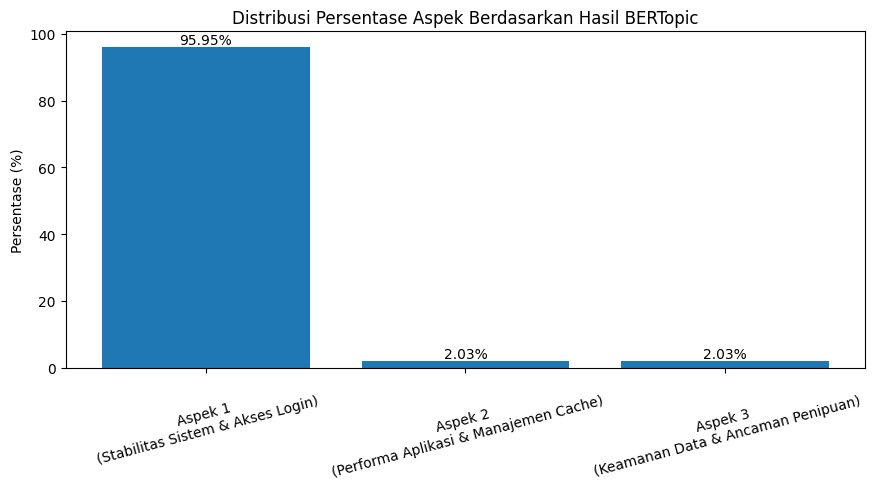

In [ ]:
import matplotlib.pyplot as plt

# === DATA TOPIK (tanpa topik -1) ===
topic_counts = {
    "Aspek 1\n(Stabilitas Sistem & Akses Login)": 2083,      # Topic 0
    "Aspek 2\n(Performa Aplikasi & Manajemen Cache)": 44,        # Topic 1
    "Aspek 3\n(Keamanan Data & Ancaman Penipuan)": 44    # Topic 2
}

# === HITUNG PERSENTASE ===
total = sum(topic_counts.values())
percentages = {k: (v / total) * 100 for k, v in topic_counts.items()}

# === VISUALISASI DIAGRAM BATANG ===
plt.figure(figsize=(9, 5))

bars = plt.bar(
    list(percentages.keys()),
    list(percentages.values())
)

# Label
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Aspek Berdasarkan Hasil BERTopic")
plt.xticks(rotation=15)

# Tambahkan label persentase di atas batang
for bar, perc in zip(bars, percentages.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{perc:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()